# Visualization
Time to visualize the results

## Define paths and variables

In [1]:
%run notebook_setup
from src.visualization import load_search_results

random_search_path = "/home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/checkpoints/search/random_search/all_results.json"
bayesian_search_path = "/home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/checkpoints/search/bayesian_search/study_results.json"
grid_search_path = "/home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/checkpoints/search/grid_search/all_results.json"
best_model_path = "/home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/checkpoints/run_1746652725.7987037/all_results.json"

random_results = load_search_results(random_search_path, is_list=True)
bayesian_results = load_search_results(bayesian_search_path, is_list=False)
grid_results = load_search_results(grid_search_path, is_list=True)
best_model_results = load_search_results(best_model_path, is_list=True)

print(f"Loaded {len(random_results)} random search trials")
print(f"Loaded {len(bayesian_results)} bayesian search trials")
print(f"Loaded {len(grid_results)} grid search trials")
print(f"Loaded best model results")


Loaded 40 random search trials
Loaded 40 bayesian search trials
Loaded 512 grid search trials
Loaded best model results


Okay, now we can start visualizing the results. Start with random search.

## Random Search

Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/random_search/epochs_vs_loss.png


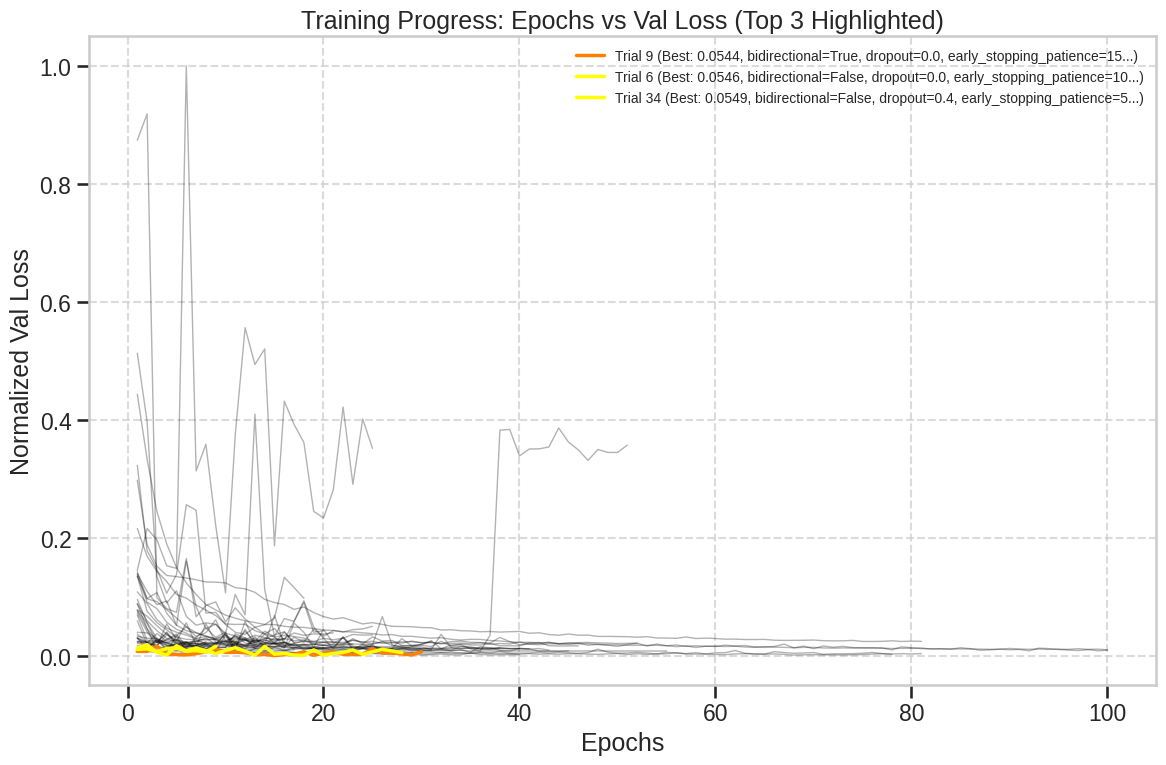

Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/random_search/hidden_size_influence.png


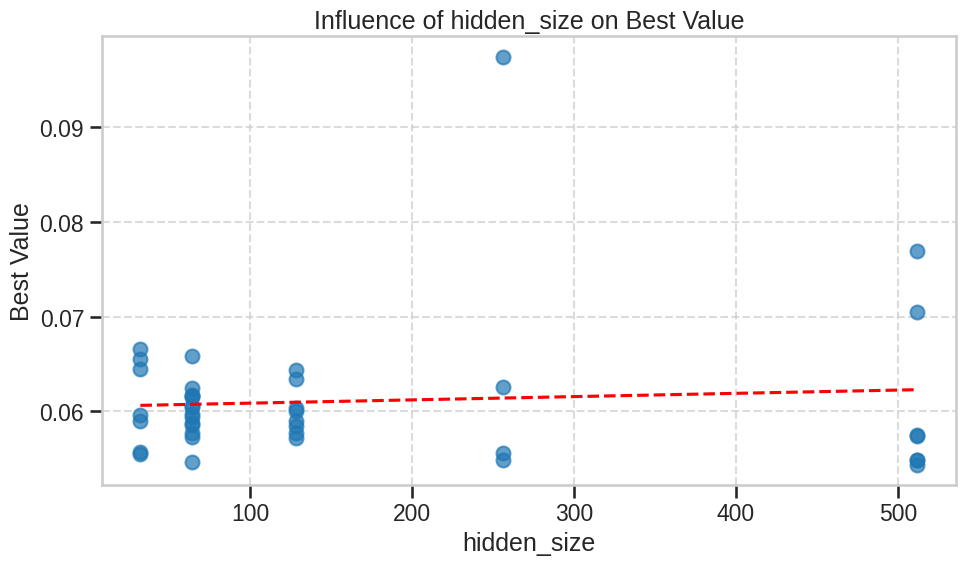

Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/random_search/parameter_correlation.png


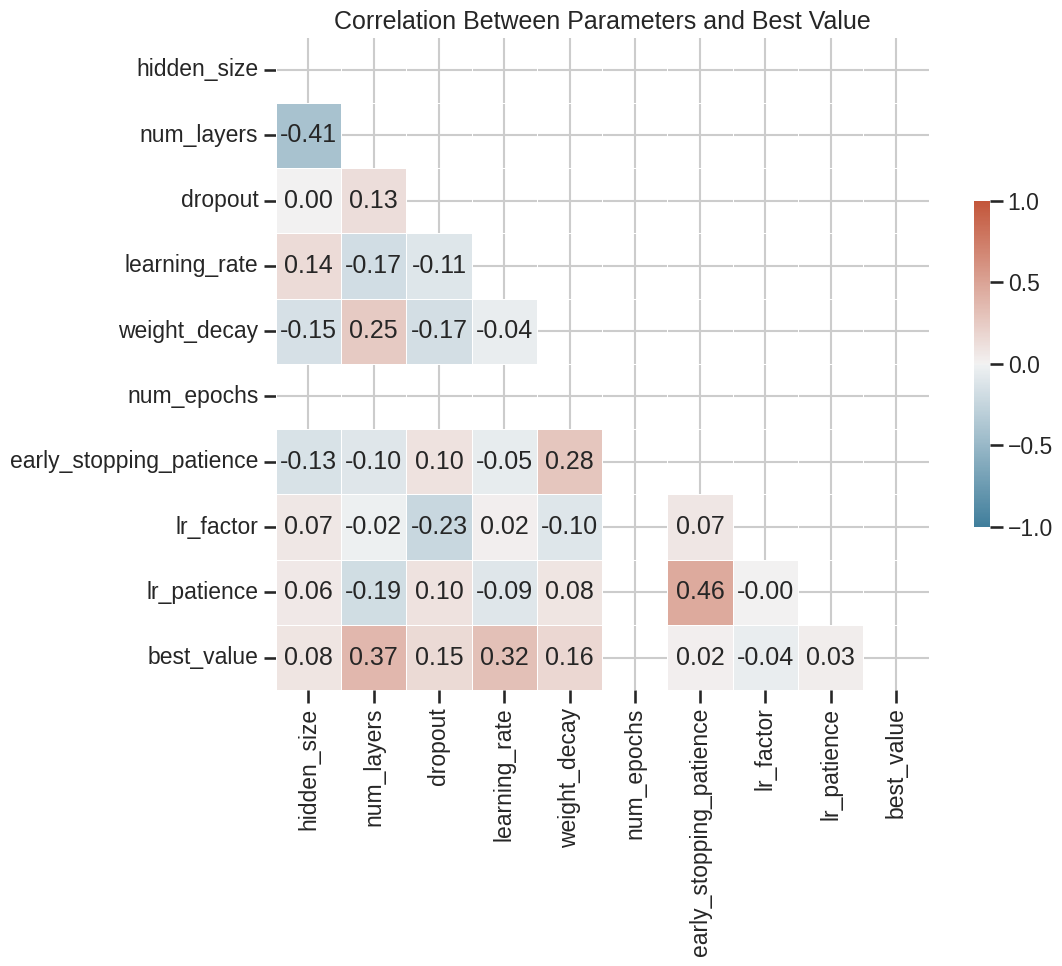

Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/random_search/learning_curves.png


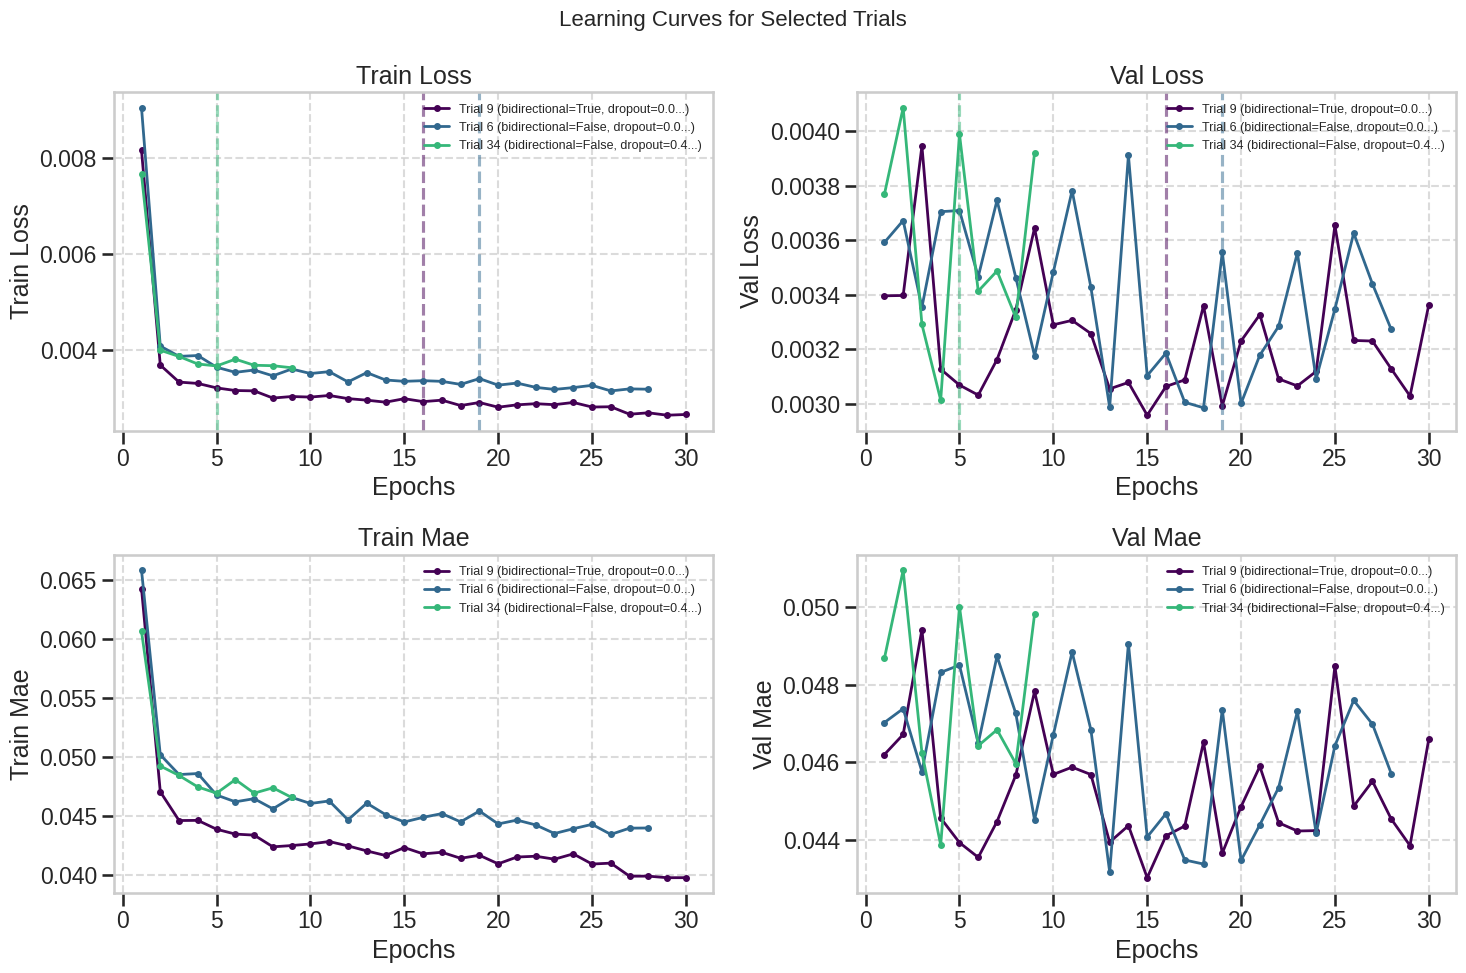

Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/random_search/search_progress.png


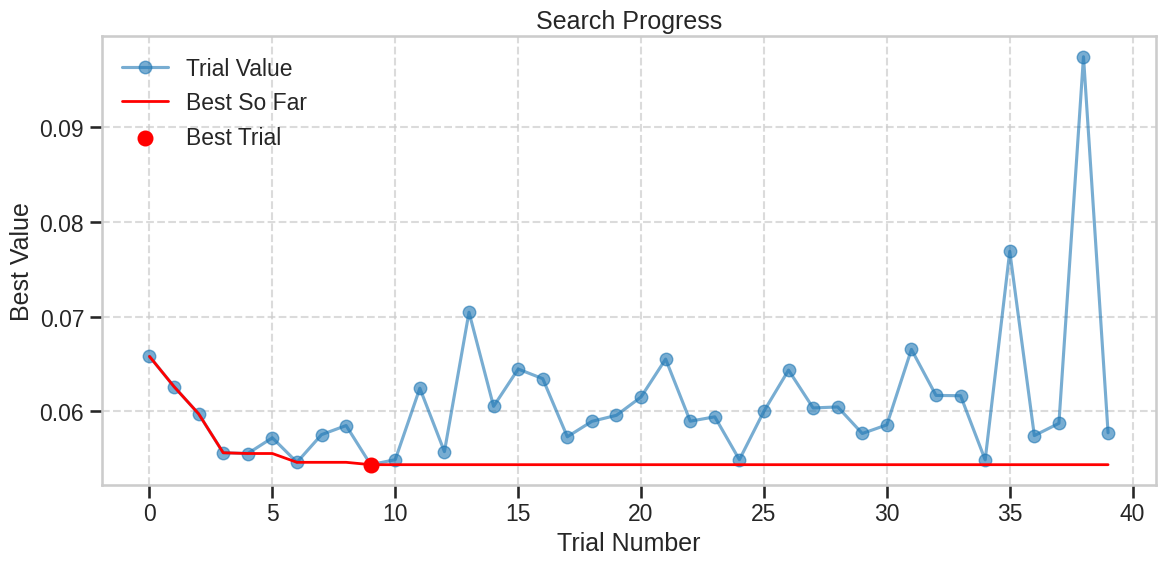

In [2]:
%run notebook_setup
from src.visualization import (
    plot_epochs_vs_loss, 
    plot_hyperparameter_influence, 
    plot_parameter_correlation_matrix, 
    plot_learning_curves,
    plot_search_progress
)
from src.config import config
import os

dir = "random_search"

plot_epochs_vs_loss(
    random_results, 
    metric='val_loss',
    save_path=os.path.join(config.dirs.plots_dir, dir, "epochs_vs_loss.png")
)

plot_hyperparameter_influence(
    random_results,
    param_name='hidden_size',
    metric='best_value',
    save_path=os.path.join(config.dirs.plots_dir, dir, "hidden_size_influence.png")
)

plot_parameter_correlation_matrix(
    random_results,
    save_path=os.path.join(config.dirs.plots_dir, dir, "parameter_correlation.png")
)

plot_learning_curves(
    random_results,
    save_path=os.path.join(config.dirs.plots_dir, dir, "learning_curves.png")
)

plot_search_progress(
    random_results,
    save_path=os.path.join(config.dirs.plots_dir, dir, "search_progress.png")
)

## Bayesian Optimization Search

Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/bayesian_search/search_progress.png


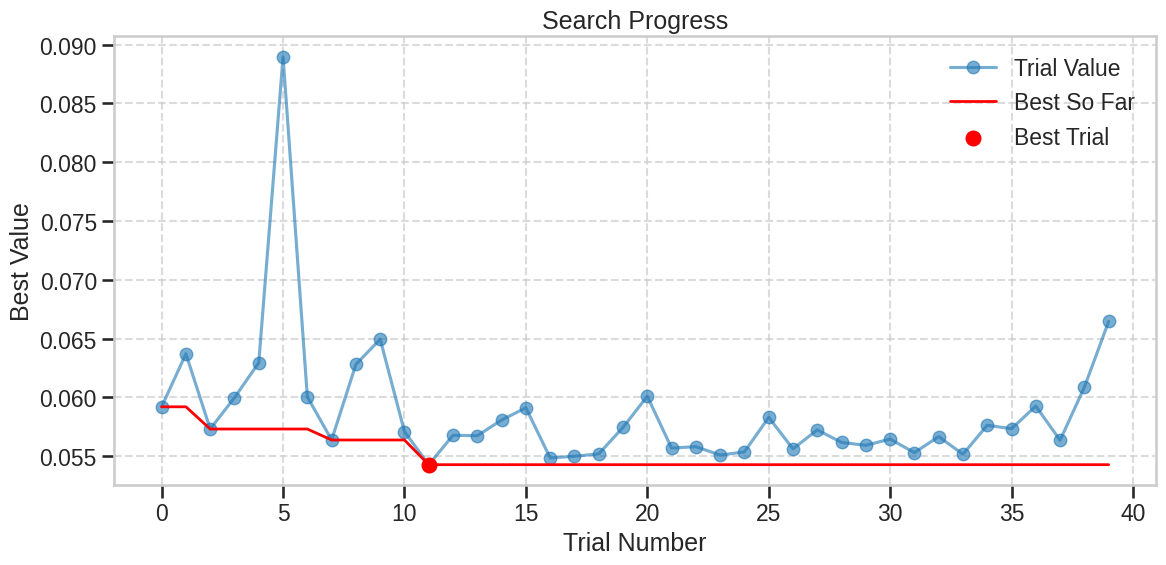

In [7]:
%run notebook_setup
from src.visualization import (
    plot_epochs_vs_loss, 
    plot_hyperparameter_influence, 
    plot_parameter_correlation_matrix, 
    plot_learning_curves,
    plot_search_progress
)
from src.config import config
import os

dir = "bayesian_search"

plot_search_progress(
    bayesian_results,
    save_path=os.path.join(config.dirs.plots_dir, dir, "search_progress.png")
)

## Grid Search

Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/grid_search/epochs_vs_loss.png


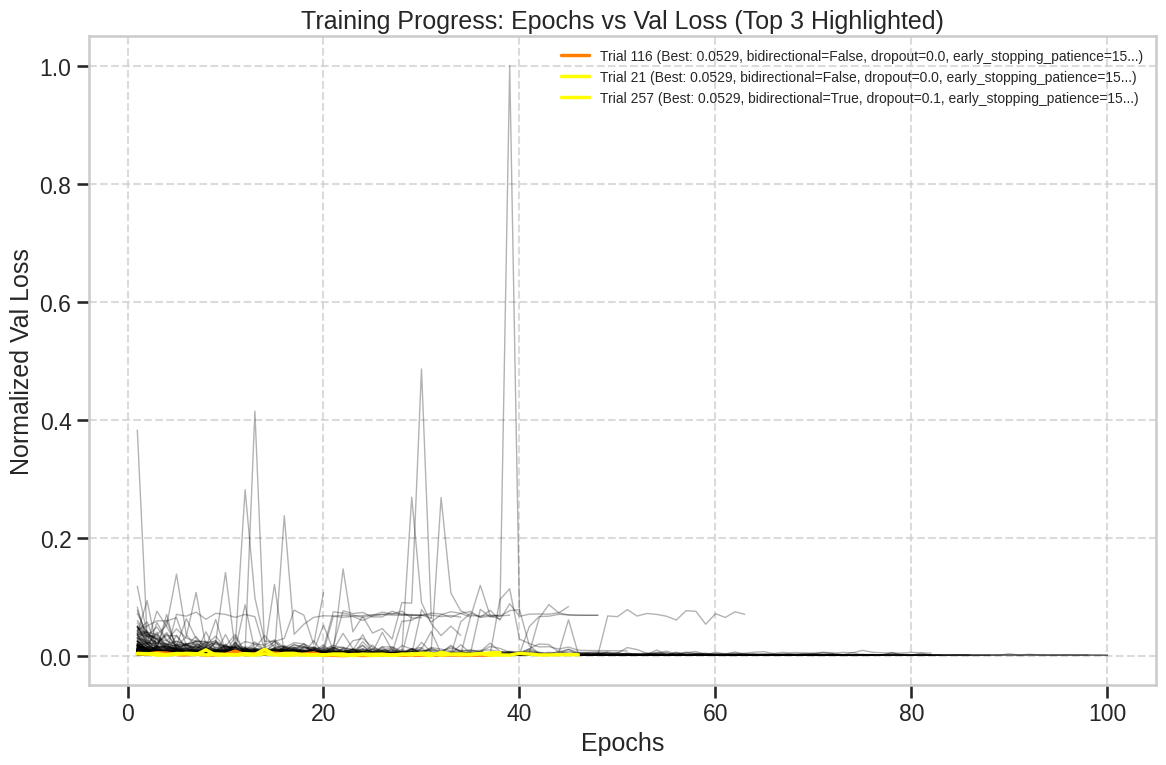

Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/grid_search/hidden_size_influence.png


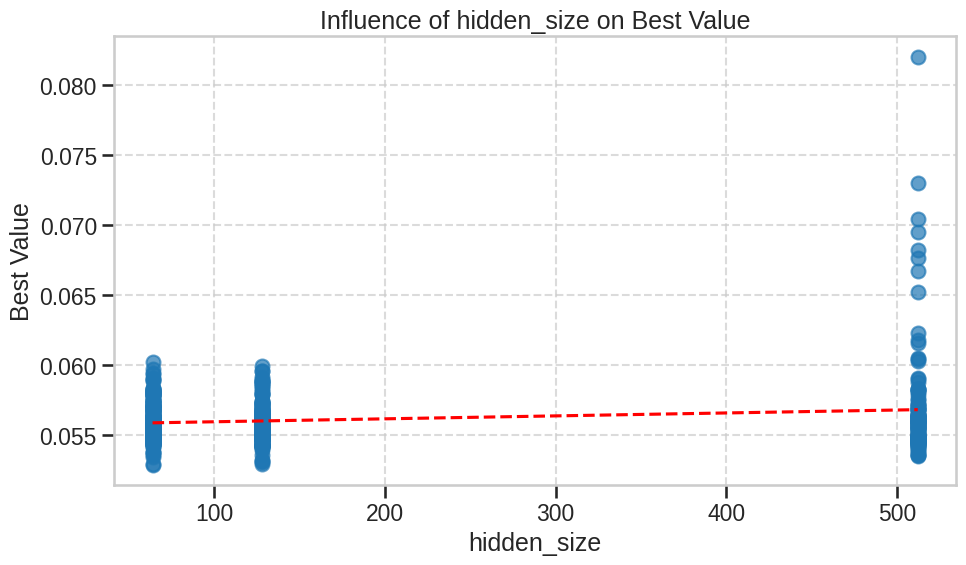

Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/grid_search/parameter_correlation.png


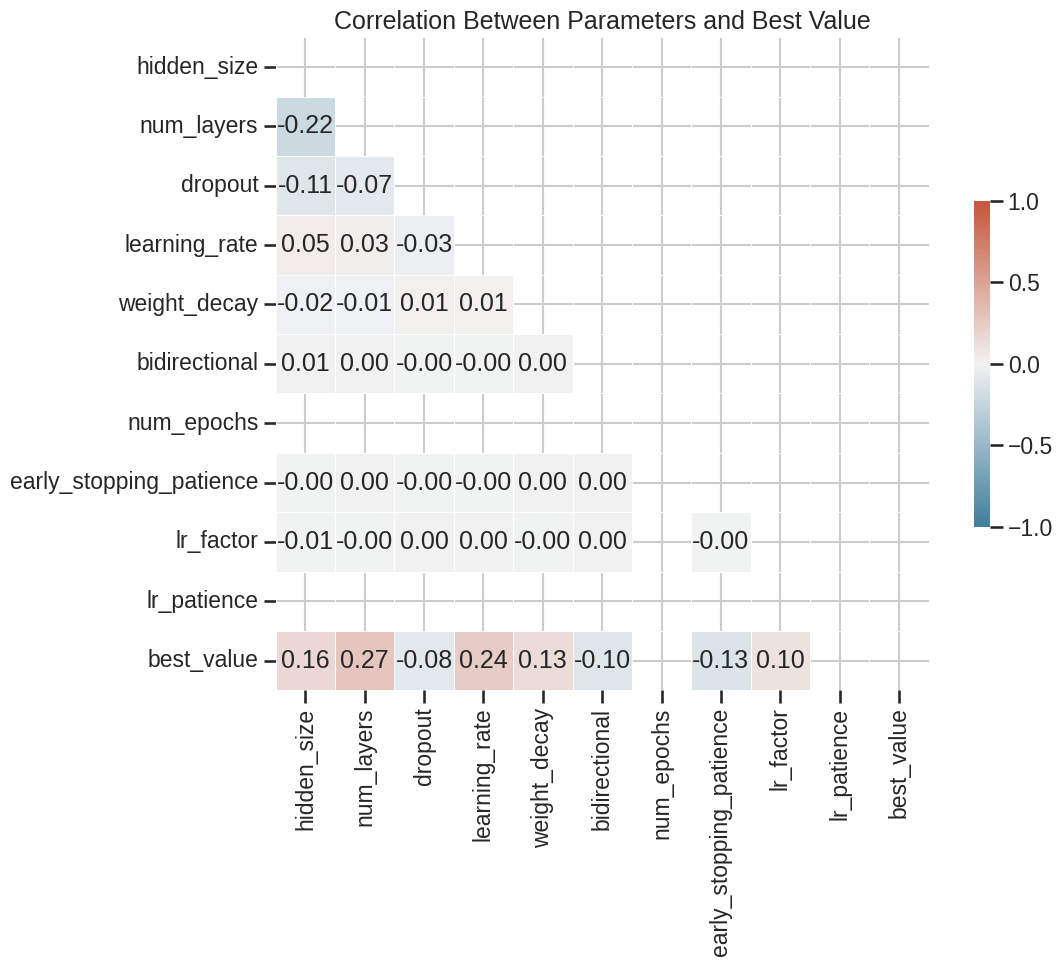

Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/grid_search/learning_curves.png


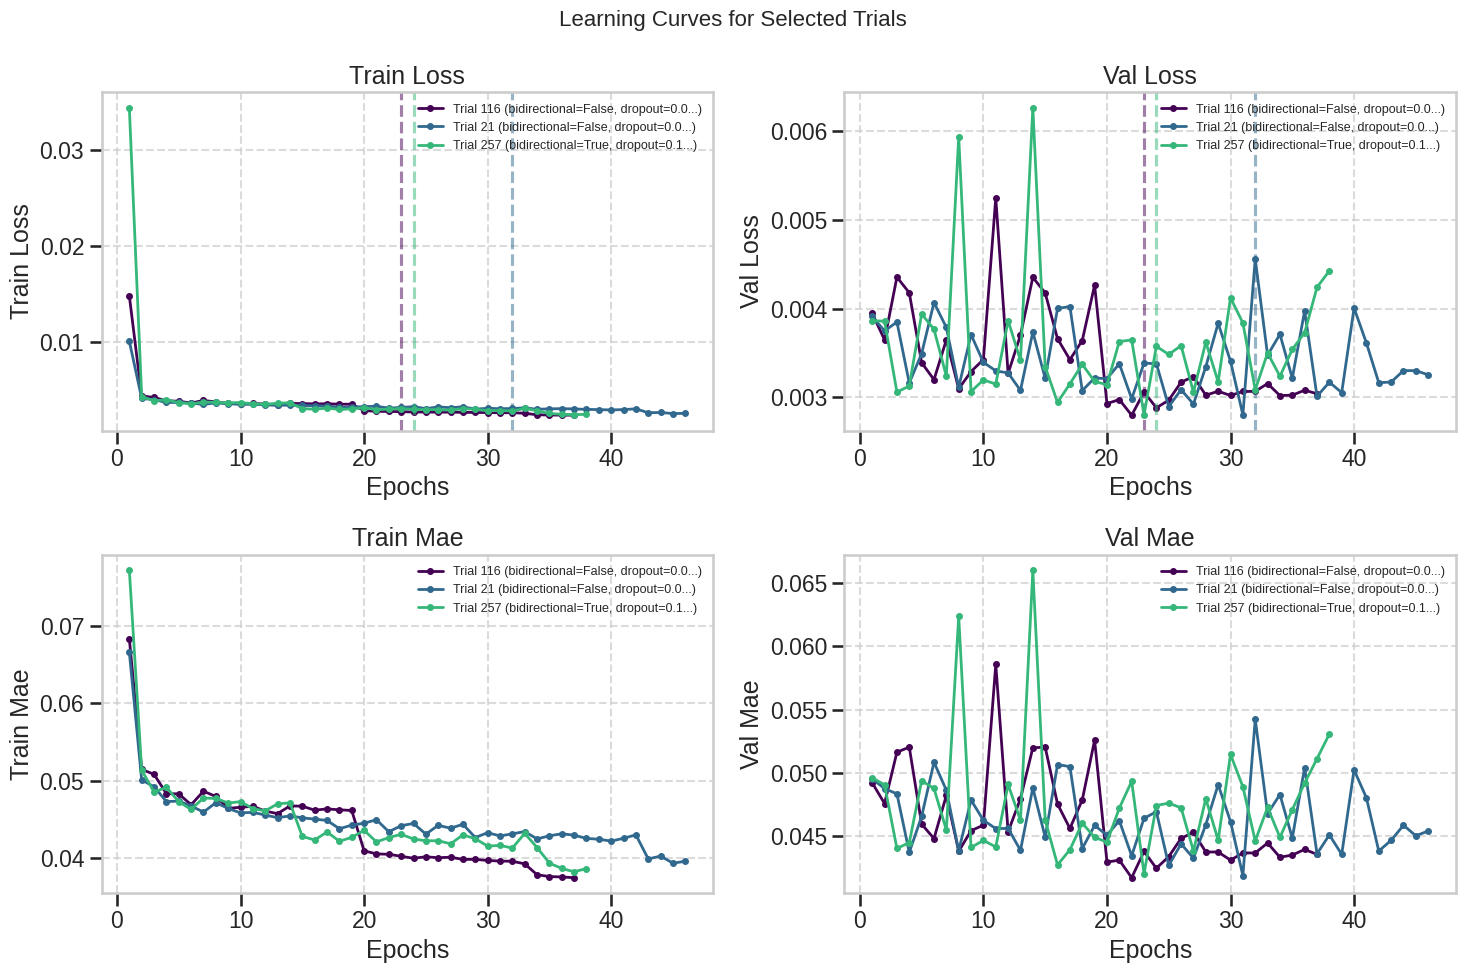

Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/grid_search/search_progress.png


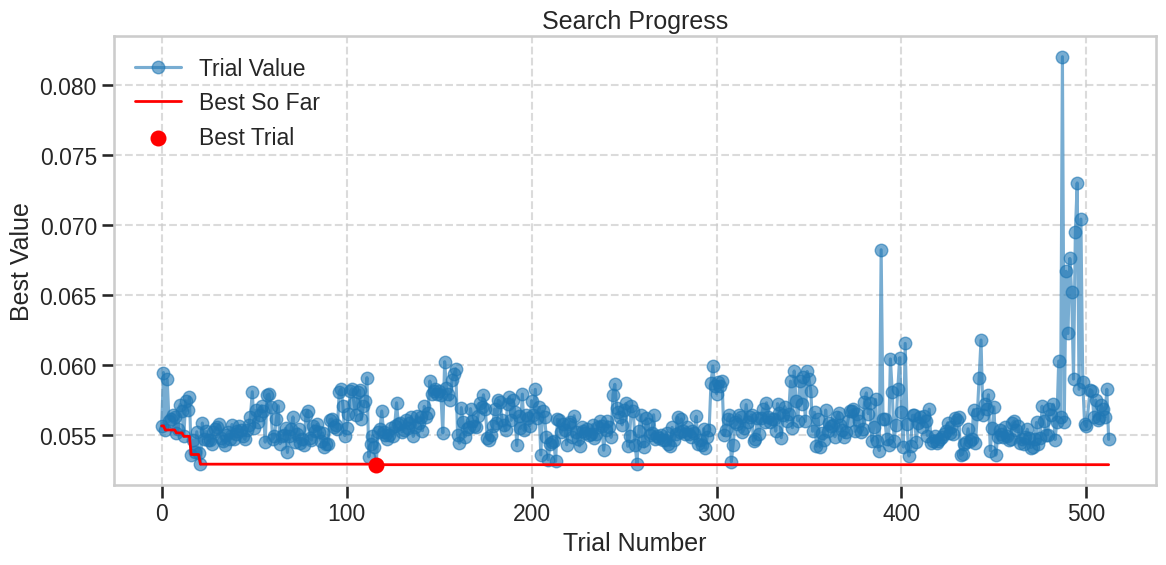

In [ ]:
%run notebook_setup
from src.visualization import (
    plot_epochs_vs_loss, 
    plot_hyperparameter_influence, 
    plot_parameter_correlation_matrix, 
    plot_learning_curves,
    plot_search_progress
)
from src.config import config
import os

dir = "grid_search"

plot_epochs_vs_loss(
    grid_results, 
    metric='val_loss',
    save_path=os.path.join(config.dirs.plots_dir, dir, "epochs_vs_loss.png")
)

plot_hyperparameter_influence(
    grid_results,
    param_name='hidden_size',
    metric='best_value',
    save_path=os.path.join(config.dirs.plots_dir, dir, "hidden_size_influence.png")
)

plot_parameter_correlation_matrix(
    grid_results,
    save_path=os.path.join(config.dirs.plots_dir, dir, "parameter_correlation.png")
)

plot_learning_curves(
    grid_results,
    save_path=os.path.join(config.dirs.plots_dir, dir, "learning_curves.png")
)

plot_search_progress(
    grid_results,
    save_path=os.path.join(config.dirs.plots_dir, dir, "search_progress.png")
)

## Best model visualization

In [14]:
%run notebook_setup

import json
import os

best_model_metrics = None
best_model_history = None

best_model_params = {
  "hidden_size": 64,
  "num_layers": 2,
  "dropout": 0.0,
  "learning_rate": 0.01,
  "weight_decay": 1e-05,
  "bidirectional": 'false',
  "num_epochs": 100,
  "early_stopping_patience": 15,
  "lr_factor": 0.1,
  "lr_patience": 10
}

with open(os.path.join(best_model_path, "test_metrics.json"), 'r') as f:
    best_model_metrics = json.load(f)

with open(os.path.join(best_model_path, "training_history.json"), 'r') as f:
    best_model_history = json.load(f)

best_model_results = [
    {
        "trial_id": 0,
        "params": best_model_params,
        "best_epoch": 0,
        "best_value": best_model_metrics["mse"],
        "history": best_model_history,
        "status": "completed",
        "duration": 0.0
    }
]

with open(os.path.join(best_model_path, "all_results.json"), 'w') as f:
    json.dump(best_model_results, f, indent=4)

Loaded best model results with 40 epochs
Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/best_model/metrics_comparison.png
Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/best_model/loss_train_val_comparison.png
Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/best_model/mae_train_val_comparison.png
Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/best_model/rmse_train_val_comparison.png
Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/best_model/r2_train_val_comparison.png
Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/best_model/error_metrics_evolution.png
Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/best_model/learning_rate_schedule.png
Plot saved to /home/kitne/University/2lvl/SU/bike-gru-experiments/experiments/plots/best_model/mode

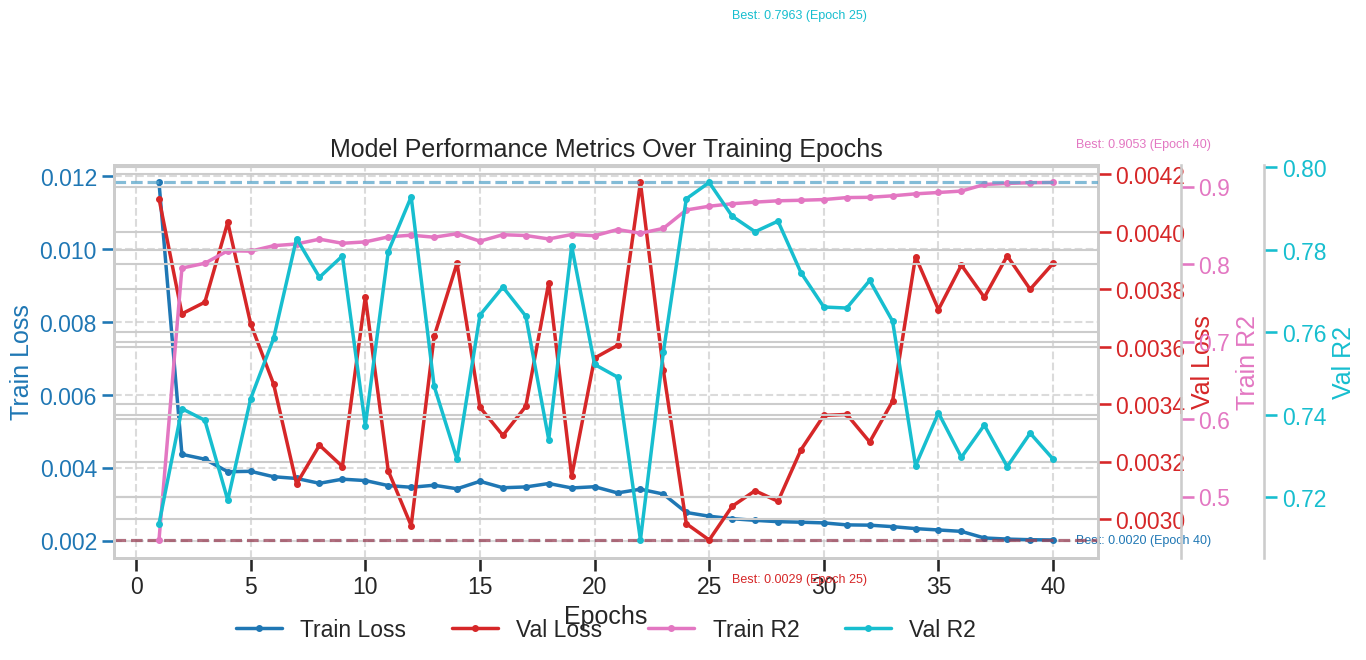

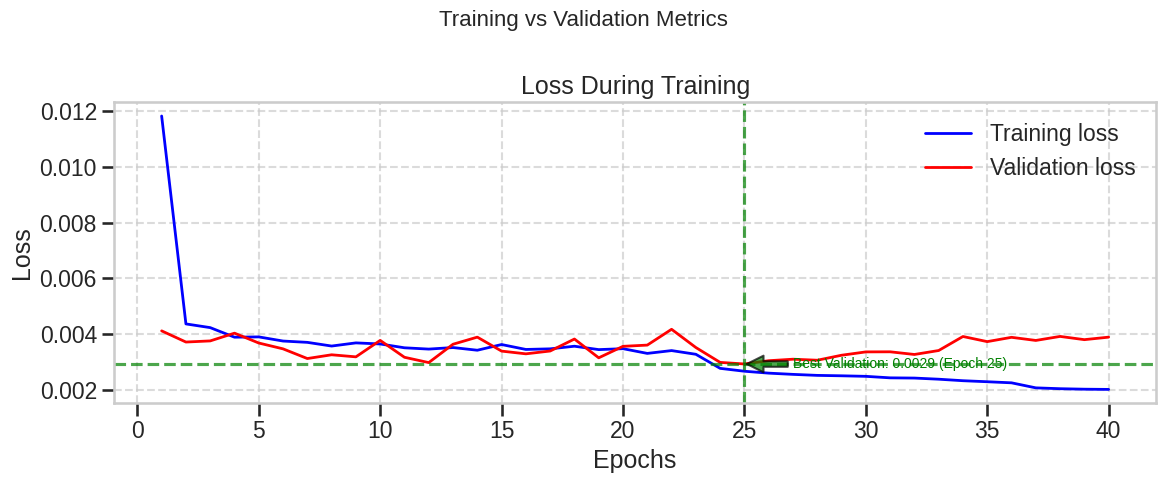

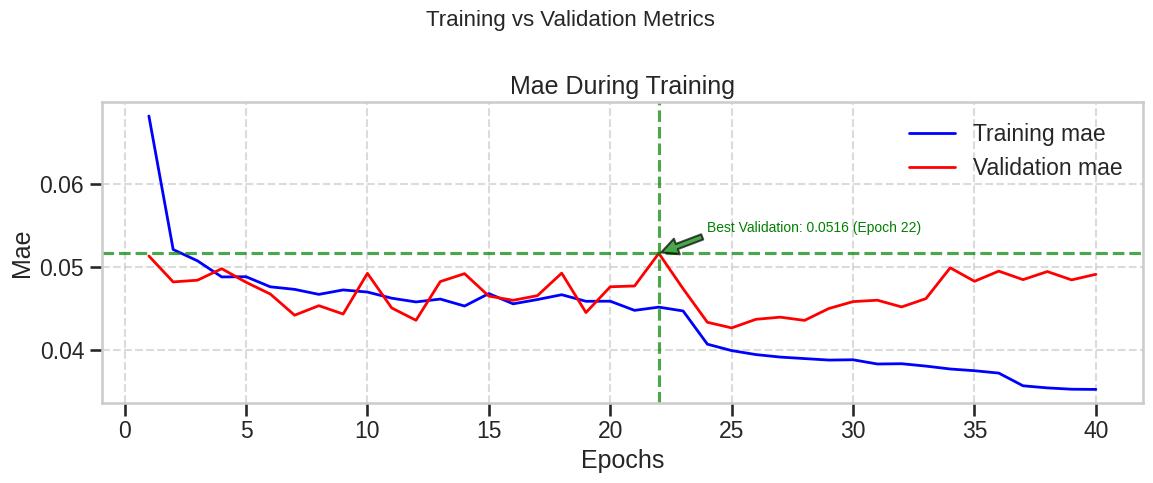

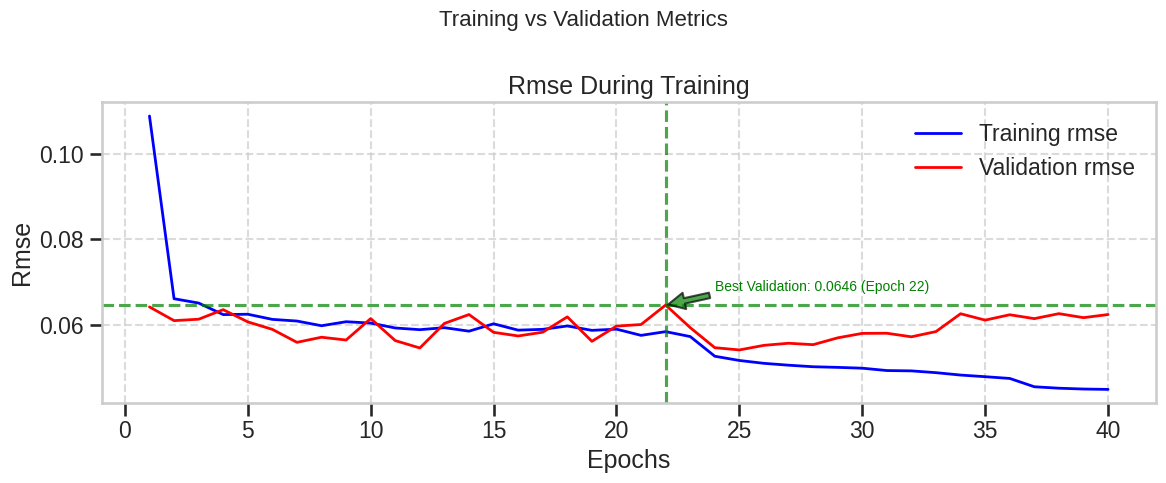

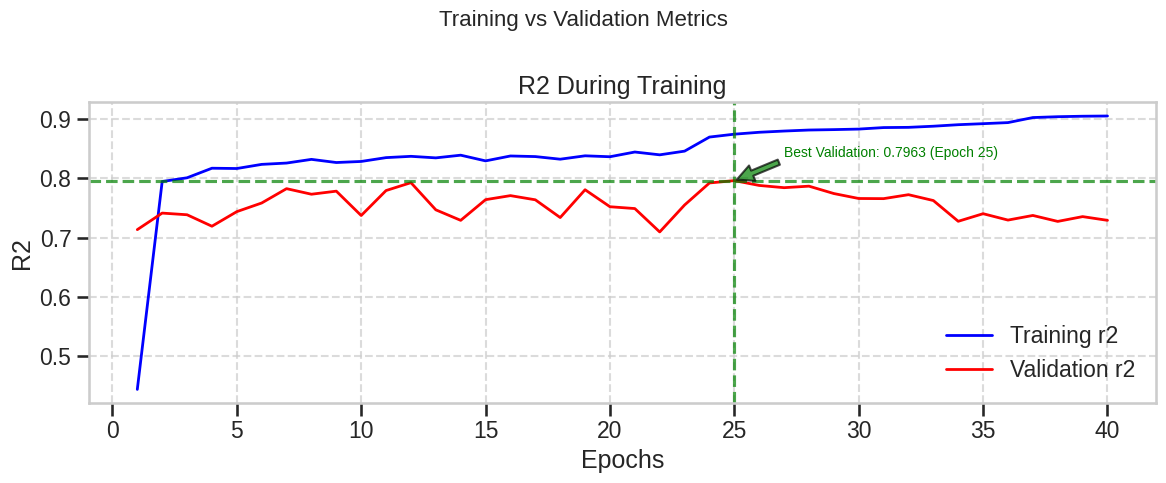

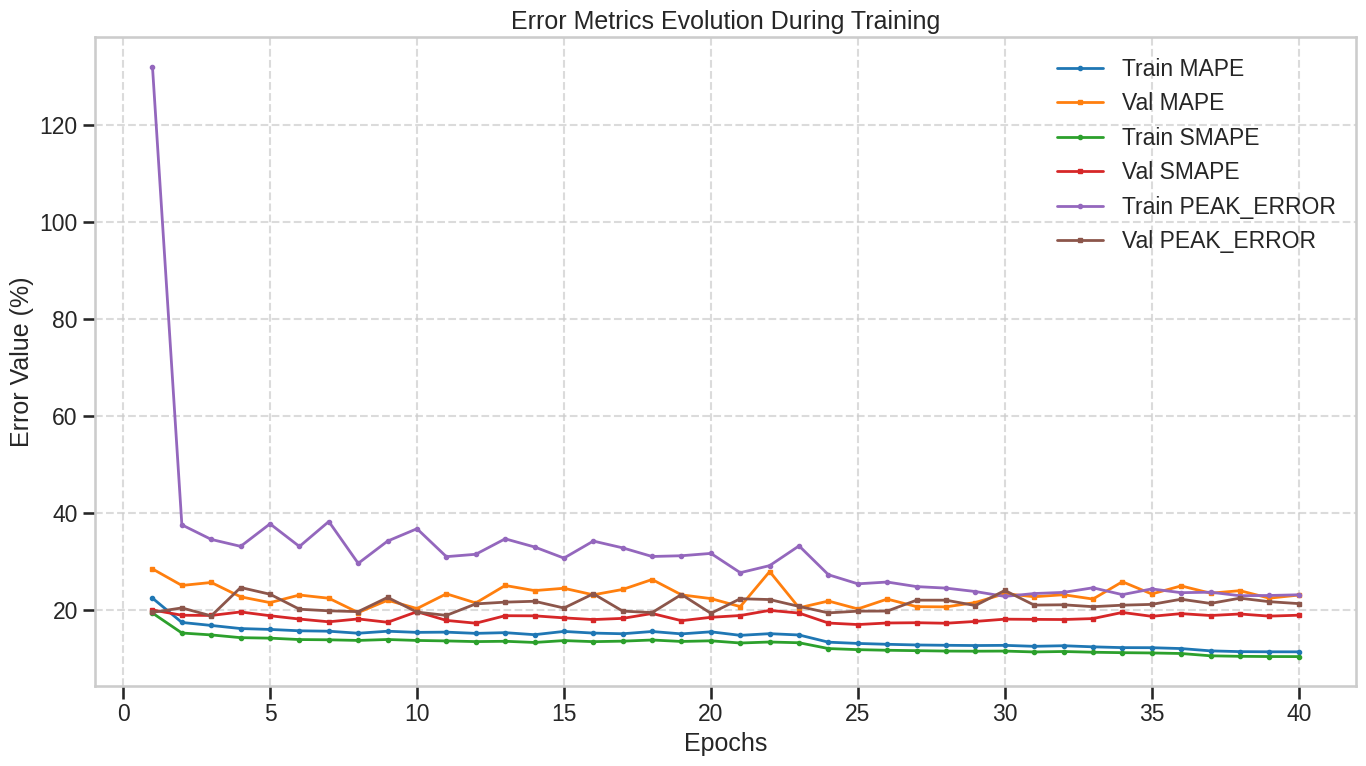

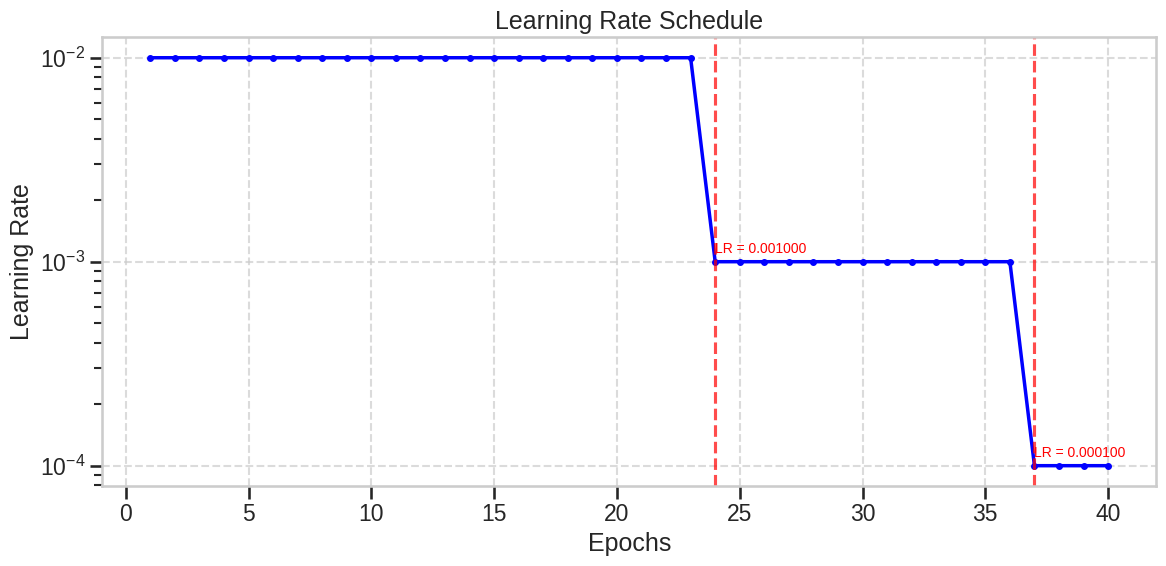

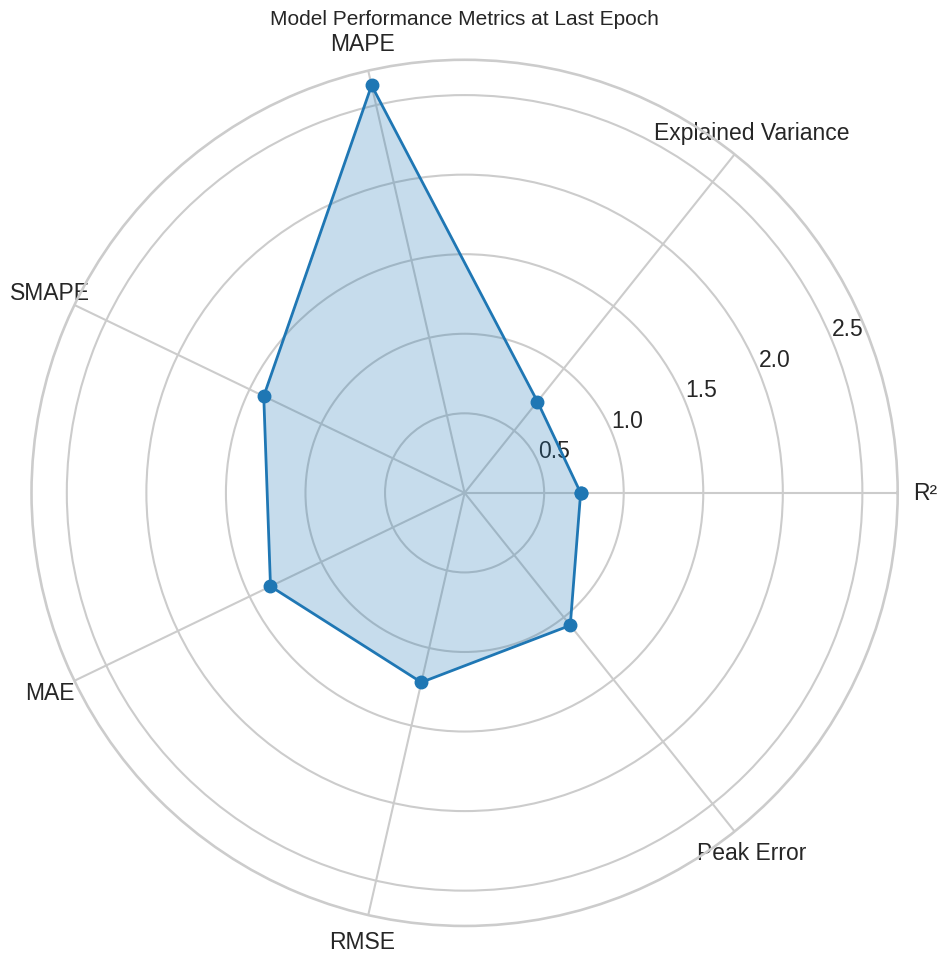

In [2]:
%run notebook_setup
from src.visualization import visualize_best_model
from src.config import config
import os

dir = "best_model"
visualize_best_model(best_model_results, os.path.join(config.dirs.plots_dir, dir))